# Netflix Movies and TV-shows Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import random
%matplotlib inline

## Knowing the dataset
I imported the datasets. Before proceeding with the analysis, I did a little bit of data manipulation in order to understand better what I am dealing with.

In [2]:
titles=pd.read_csv('titles.csv')
cast=pd.read_csv('credits.csv')

In [3]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


Because some observations are in an array form, it is important to fix them. So, I defined a function that helped me to avoid this problem.

In [4]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)
        # return ":".join(arr)

In [5]:
titles["production_countries"] = titles["production_countries"].apply(repair_array_bound_categories)
titles["genres"] = titles["genres"].apply(repair_array_bound_categories)

In [6]:
titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                    68
production_countries     232
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

The NaN values in the variables expressing a rating (review or popularity index) were replaced with a value of 0, thanks to the following function. For the visualization, I did not consider the other NaN values because they were not relevant.

In [7]:
filling=('imdb_score','tmdb_popularity','tmdb_score')

for col_ in filling:
    titles[col_].fillna(0.0, inplace=True)

Then, I decided to proceed by separating the films from the TV series. I then performed a data visualisation to compare films and TV series, in order to better understand their distribution in the Netflix catalogue.

In [8]:
films=titles[titles['type']=='MOVIE']

In [9]:
films=films.drop('seasons',axis=1)

In [10]:
films=films.sort_values(['release_year', 'imdb_score'], ascending=False)

In [11]:
films

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5111,tm1025493,Dasvi,MOVIE,"Jailed under a tough cop, an uneducated politi...",2022,NaN,125,drama,IN,tt14107554,8.0,13140.0,8.133,5.7
5346,tm1171107,Surviving Paradise: A Family Tale,MOVIE,As the Kalahari Desert faces a worsening dry s...,2022,NaN,78,documentation,GB,tt18059108,7.5,551.0,75.026,6.4
4924,tm1138477,Downfall: The Case Against Boeing,MOVIE,Investigators reveal how Boeing’s alleged prio...,2022,R,89,documentation,US,tt11893274,7.4,9428.0,31.888,7.2
4857,tm852172,Apollo 10½: A Space Age Childhood,MOVIE,A man narrates stories of his life as a 10-yea...,2022,PG-13,98,romance,NL,tt7978758,7.3,4932.0,12.340,7.1
4890,tm1185360,Return to Space,MOVIE,The inspirational rise of SpaceX as well as El...,2022,NaN,128,documentation,US,tt18555320,7.3,3270.0,35.747,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,crime,EG,tt0051390,7.5,4385.0,3.556,7.4
22,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,drama,EG,tt0049761,6.7,590.0,1.044,5.9
15,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,music,US,tt0047673,7.5,42373.0,9.710,7.2
28,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,crime,EG,tt0044429,7.4,1219.0,1.866,7.0


In [12]:
films.isnull().sum()

id                         0
title                      1
type                       0
description                8
release_year               0
age_certification       2353
runtime                    0
genres                    36
production_countries     152
imdb_id                  308
imdb_score                 0
imdb_votes               368
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [13]:
tvshow=titles[titles['type']=='SHOW']

In [14]:
tvshow=tvshow.sort_values(['release_year', 'imdb_score'], ascending=False)

In [15]:
tvshow

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5059,ts296563,Who Rules The World,SHOW,A legendary wuxia romance that focuses on the ...,2022,TV-PG,44,fantasy,CN,1.0,tt14950036,9.2,81.0,57.401,8.7
4832,ts217231,Heartstopper,SHOW,Teens Charlie and Nick discover their unlikely...,2022,TV-14,28,romance,GB,1.0,tt10638036,8.9,28978.0,926.362,8.9
4965,ts302363,Twenty Five Twenty One,SHOW,The dreams of two young people are crushed by ...,2022,TV-14,76,drama,KR,1.0,tt17513352,8.7,4081.0,76.371,8.6
4938,ts321513,My Liberation Notes,SHOW,"Three siblings, exhausted by the monotony of d...",2022,TV-14,62,romance,KR,1.0,tt15146130,8.4,276.0,62.434,8.0
5573,ts310628,MaveriX,SHOW,Six young motocross riders come together to fo...,2022,NaN,23,family,AU,1.0,tt15373864,8.4,31.0,2.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,action,US,4.0,tt0083437,6.9,33760.0,44.378,7.5
67,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,15,family,GB,10.0,tt0081848,7.4,3514.0,7.748,7.4
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,comedy,NaN,1.0,tt0202477,8.1,2144.0,1.490,7.0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,european,GB,4.0,tt0063929,8.8,72895.0,12.919,8.3


## Data Visualization

From here, the data visualization begins.

In [16]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3759 entries, 5111 to 24
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3759 non-null   object 
 1   title                 3758 non-null   object 
 2   type                  3759 non-null   object 
 3   description           3751 non-null   object 
 4   release_year          3759 non-null   int64  
 5   age_certification     1406 non-null   object 
 6   runtime               3759 non-null   int64  
 7   genres                3723 non-null   object 
 8   production_countries  3607 non-null   object 
 9   imdb_id               3451 non-null   object 
 10  imdb_score            3759 non-null   float64
 11  imdb_votes            3391 non-null   float64
 12  tmdb_popularity       3759 non-null   float64
 13  tmdb_score            3759 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 440.5+ KB


Firstly, I decided to visualize the distribution of films and tv shows over the year:

Text(0.5, 1.0, 'Tv-shows distribution')

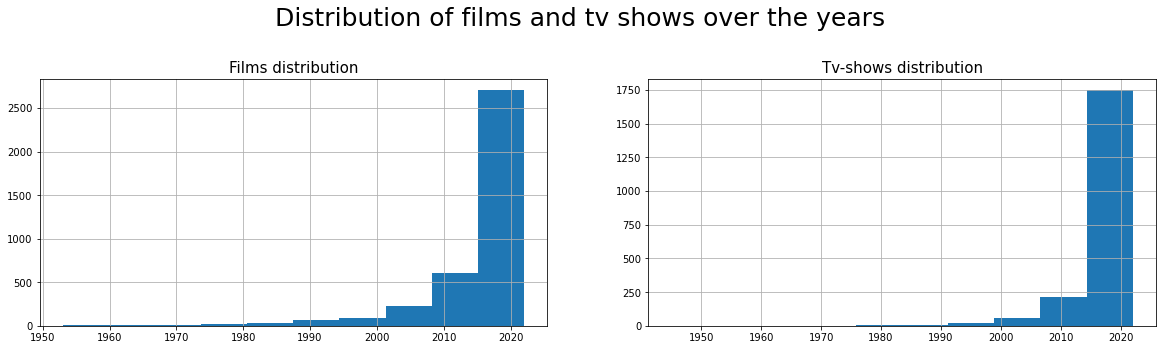

In [17]:
f2 = plt.figure(figsize=(60,30),constrained_layout=False)
gs = f2.add_gridspec(2, 2)
f2.suptitle("Distribution of films and tv shows over the years",fontsize=25)
f2_ax1 = f2.add_subplot(gs[0,0])
films["release_year"].hist(figsize=(20, 10));
plt.title('Films distribution',fontsize=15)

gs = f2.add_gridspec(2, 2)
f2_ax2 = f2.add_subplot(gs[0,1])
tvshow["release_year"].hist(figsize=(20, 10));
plt.title('Tv-shows distribution',fontsize=15)


Histograms showed that there was a big increase of shows and films from 10s to 20s. This is an expected result because it corresponds to <b> the rise</b> of Netflix.


Always thanks to histograms, I was able to visualise the most common age certification on Netflix.

Text(0.5, 1.0, 'Tv-shows age certification')

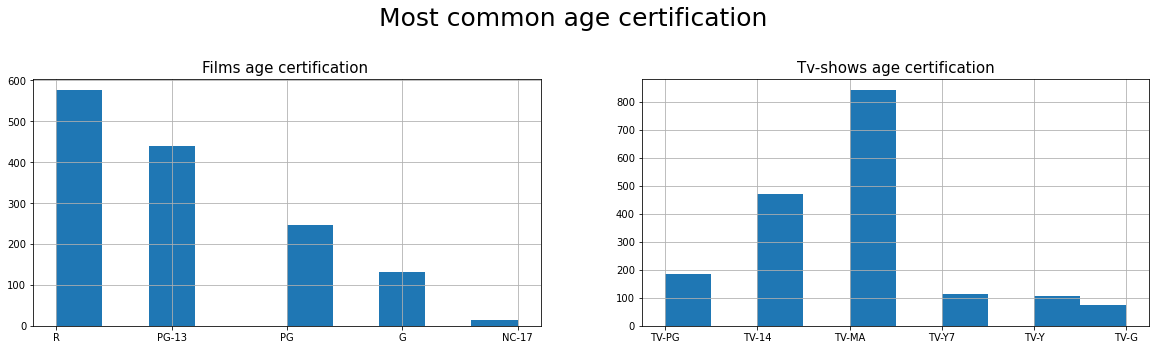

In [18]:
f2 = plt.figure(figsize=(60,30),constrained_layout=False)
gs = f2.add_gridspec(2, 2)
f2.suptitle("Most common age certification",fontsize=25)
f2_ax1 = f2.add_subplot(gs[0,0])
films["age_certification"].hist(figsize=(20, 10));
plt.title('Films age certification ',fontsize=15)

gs = f2.add_gridspec(2, 2)
f2_ax2 = f2.add_subplot(gs[0,1])
tvshow["age_certification"].hist(figsize=(20, 10));
plt.title('Tv-shows age certification',fontsize=15)

Histograms showed that:
- most films have an R rating;
- most tv shows have a TV-MA rating (more than 17 y.o.)

Thanks to the pie chart, we can know what are the most popular types (movies or shows)

<AxesSubplot:title={'center':'The most popular type'}, ylabel='tmdb_popularity'>

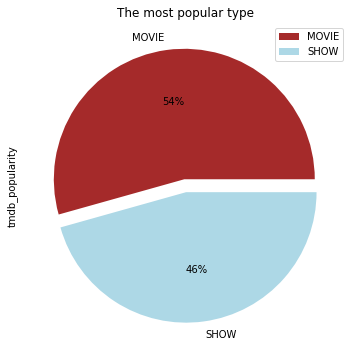

In [26]:
# What are the most popular types?
titles.groupby(['type']).sum().plot(kind='pie', y='tmdb_popularity', 
                                                 title='The most popular type', colors=['brown', 'lightblue'], autopct='%1.0f%%', 
                                     explode=[0.05]*2,figsize=(6,6))

In conclusion, barplot was helpful to answer to the question: *what is the most popular genres?*

Text(0, 0.5, 'Tv-shows')

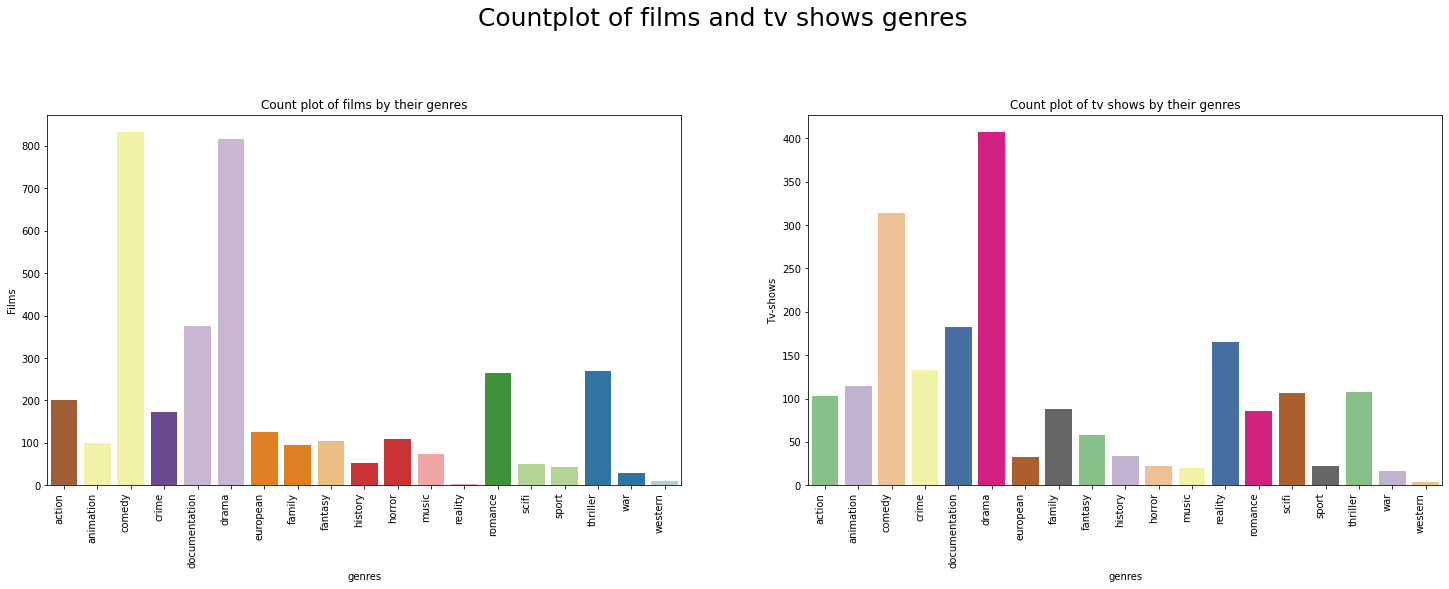

In [24]:
f4 = plt.figure(figsize=(25,15),constrained_layout=False)
gs = f4.add_gridspec(2, 2)
f4.suptitle("Countplot of films and tv shows genres",fontsize=25)
f4_ax1 = f4.add_subplot(gs[0,0])
df_plt1 = films.groupby('genres').size().to_frame('Count')
g = sns.barplot(x = df_plt1.index, y = 'Count', data = df_plt1,palette='Paired_r')
g.set(title='Count plot of films by their genres')
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set_ylabel('Films')

gs = f4.add_gridspec(2, 2)
f4_ax2 = f4.add_subplot(gs[0,1])
df_plt2 = tvshow.groupby('genres').size().to_frame('Count')
g = sns.barplot(x = df_plt2.index, y = 'Count', data = df_plt2,palette= 'Accent')
g.set(title='Count plot of tv shows by their genres')
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set_ylabel('Tv-shows')

- movies most popular genres are: comedy, drama and documentation.
- shows most popular genres are: drama, comedy and documentation.

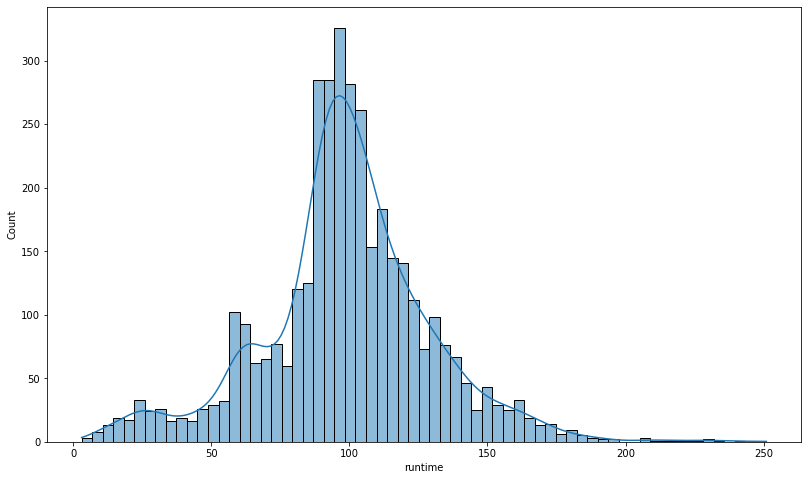

In [38]:
plt.figure(figsize=(13.5,8))
_=sns.histplot(data = films, x = "runtime",kde=True)

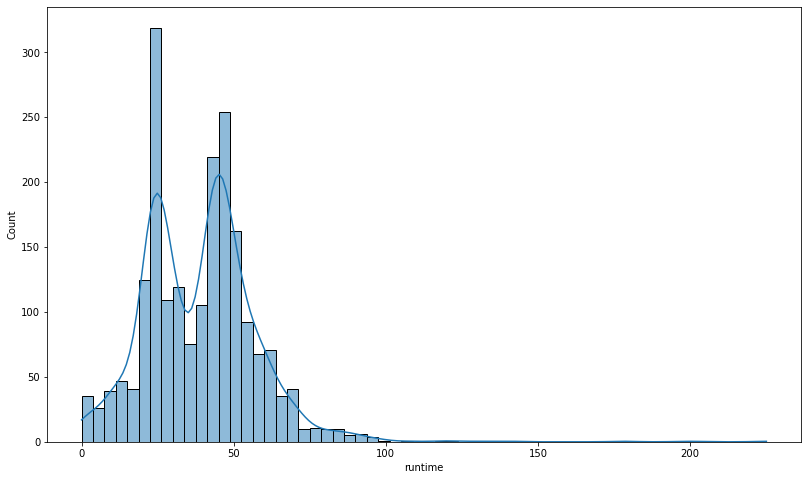

In [39]:
plt.figure(figsize=(13.5,8))
_=sns.histplot(data = tvshow, x = "runtime",kde=True)